# Urban Simulation Networks 1 
## Networkx Examples

 This code shows you how to use NetworkX for basic network manipulations:
 
 1) how to create a graph
 
 2) how to create the edge list and adjacency matrix for undirected, directed, weighted and unweighted networks
 
 3) Compute the degree of nodes, the number of nodes and of links 
 

 
 You will need to have installed the packages
 * Numpy
 * NetworkX - For creating and anlaysing networks
 * Matplotlib - For drawing networks

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Tell matplotlib to show plots within the notebook
%matplotlib inline

In [3]:
# Craete exmple graph from Newmans book
g1 = nx.Graph()

# Add some nodes and edges to the graph - this automatically creates nodes as well
edges1 = [(1,2), (2,3), (2,4), (3,4), (3,5), (1,5), (3,6)]
g1.add_edges_from(edges1)

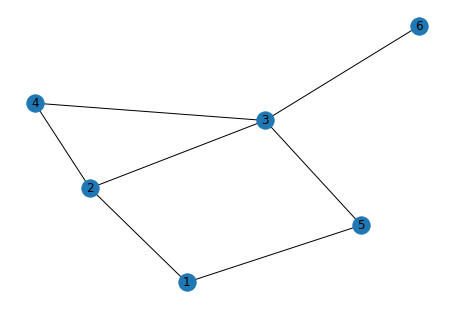

In [4]:
# This command uses matplotlib to draw the graph
nx.draw(g1, with_labels=True)

# Warnings are raised due to the NetworkX package usinga  deprecaiated Matplotlib 
# command

In [5]:
# Get the Graph's nodes
g1.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [6]:
# Get the graph's edges
g1.edges()

EdgeView([(1, 2), (1, 5), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6)])

In [7]:
# Store the graph's edges as an array
edgeArray = np.array(g1.edges())
print(edgeArray) # Prints the array
print(edgeArray[1]) # Prints the 2nd edge in the array
print(edgeArray[1][0]) # Prints one of the nodes the 2nd edge conencts to

[[1 2]
 [1 5]
 [2 3]
 [2 4]
 [3 4]
 [3 5]
 [3 6]]
[1 5]
1


In [8]:
# Get dictionary of node adjacency
g1.adj

AdjacencyView({1: {2: {}, 5: {}}, 2: {1: {}, 3: {}, 4: {}}, 3: {2: {}, 4: {}, 5: {}, 6: {}}, 4: {2: {}, 3: {}}, 5: {1: {}, 3: {}}, 6: {3: {}}})

In [9]:
# Get the adjacency matrix. Returns a SciPy sparse matrix object
g1_adj = nx.adjacency_matrix(g1)
g1_adj

<6x6 sparse matrix of type '<class 'numpy.int32'>'
	with 14 stored elements in Compressed Sparse Row format>

In [10]:
# To view elements of a sparse matrix use print() function
# Will only print non-zero elements since it is a sparse matrix
print(g1_adj[1])

  (0, 0)	1
  (0, 2)	1
  (0, 3)	1


In [11]:
# Will show zero elements if specifically requested
print(g1_adj[1,5])

0


In [12]:
# Alternatively can convert to a dense matrix object, but this will take up 
# more memory
g1_adj_dense = g1_adj.todense()
g1_adj_dense

matrix([[0, 1, 0, 0, 1, 0],
        [1, 0, 1, 1, 0, 0],
        [0, 1, 0, 1, 1, 1],
        [0, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0]], dtype=int32)

In [13]:
g1_adj_dense[0]

matrix([[0, 1, 0, 0, 1, 0]], dtype=int32)

In [14]:
g1_adj_dense[0,4] # Gives weight of connection between node 1 and 5

1

In [15]:
# Get the degree of each node
g1.degree(nbunch = None, weight = None)

DegreeView({1: 2, 2: 3, 3: 4, 4: 2, 5: 2, 6: 1})

In [16]:
# Graph diameter
nx.diameter(g1)

3

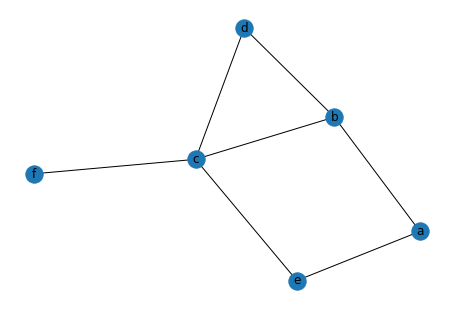

In [17]:
# Networks can be created using letters instead of numbers

# This time start with 1D array of characters, reshape into a 2D array and use
# this as the edge list
edges2 = np.reshape([ 'a','b', 'b','c', 'b','d', 'c','d', 'c','e', 'a','e', 'c','f'], (-1,2))
g1n = nx.Graph()
g1n.add_edges_from(edges2)
nx.draw(g1n, with_labels=True)

In [18]:
# Get the vertices of the graph
g1n.nodes()

NodeView(('b', 'a', 'e', 'd', 'c', 'f'))

In [19]:
# Get the degree of the nodes
g1n.degree()

DegreeView({'b': 3, 'a': 2, 'e': 2, 'd': 2, 'c': 4, 'f': 1})

In [20]:
# Get the diameter of the graph
nx.diameter(g1n)

3

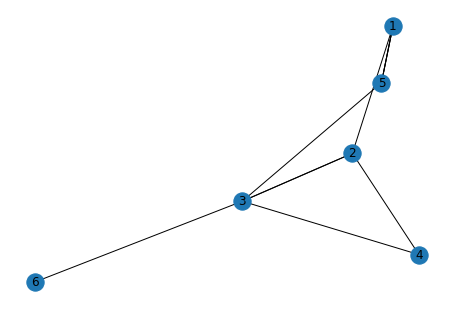

In [21]:
# Create a graph with multiedges and self edges. 
# For this we need to use the MultiGraph function
g2 = nx.MultiGraph()
g2.add_edges_from([(1,2), (2,2), (2,3), (2,3), (2,4), (3,4), (3,5), 
                           (1,5),(1,5),(5,1), (3,6), (6,6)])

# Drawing the graph does not show the multiple edges
nx.draw(g2, with_labels=True)

In [22]:
# But inspecting the edgelist o the graph shows that there are multiple edges
g2.edges()

MultiEdgeDataView([(1, 2), (1, 5), (1, 5), (1, 5), (2, 2), (2, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (6, 6)])

In [23]:
# Also inspecting the degrees of nodes shows that there are multiple edges
g2.degree()

MultiDegreeView({1: 4, 2: 6, 3: 5, 4: 2, 5: 4, 6: 3})

In [24]:
# To calculate the degree excluding self loops, make a copy of the graph and 
# remove self loops
g2_no_sl = g2.copy()
sles = nx.selfloop_edges(g2_no_sl)
g2_no_sl.remove_edges_from(list(sles))

# Then calculate the degrees, notice that the degree of node 6 is 1 now
g2_no_sl.degree()

MultiDegreeView({1: 4, 2: 4, 3: 5, 4: 2, 5: 4, 6: 1})

In [25]:
# Get the adjacency matrix of the network
g2_adj = nx.adjacency_matrix(g2)
print(g2_adj)

  (0, 1)	1
  (0, 4)	3
  (1, 0)	1
  (1, 1)	1
  (1, 2)	2
  (1, 3)	1
  (2, 1)	2
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (3, 1)	1
  (3, 2)	1
  (4, 0)	3
  (4, 2)	1
  (5, 2)	1
  (5, 5)	1


In [26]:
# Or formatted a different way
nx.adjacency_matrix(g2).todense()

# Note that calculating the node degree for node 2 by summing the values in the second column of the adjacency matrix
# gives a different answer to gs.degree() 

# This is because self-loops in the adjacency matrix are represented with 1 in the diagonal, but a value of 2 is used
# in theoretical calculations

matrix([[0, 1, 0, 0, 3, 0],
        [1, 1, 2, 1, 0, 0],
        [0, 2, 0, 1, 1, 1],
        [0, 1, 1, 0, 0, 0],
        [3, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1]], dtype=int32)

In [27]:
# Diameter of the network again
nx.diameter(g2)

3

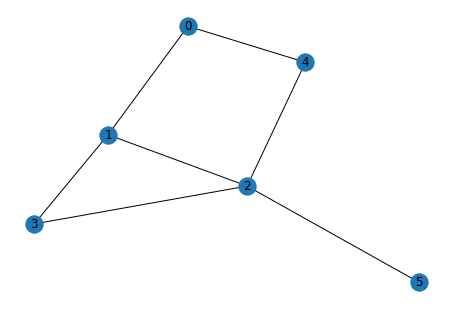

In [28]:
# Create a network from an ajacency matrix

adj_A = np.array([[0,1,0,0,3,0],
                  [1,1,2,1,0,0],
                  [0,2,0,1,1,1],
                  [0,1,1,0,0,0],
                  [3,0,1,0,0,0],
                  [0,0,1,0,0,1]
                  ])

g3 = nx.from_numpy_matrix(adj_A)
nx.draw(g3, with_labels=True)

In [29]:
# Again, need to check edge list or degree to confirm that multi edges and
# self loops are included
g3.edges()

EdgeView([(0, 1), (0, 4), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (5, 5)])

In [30]:
g3.degree()

DegreeView({0: 2, 1: 5, 2: 4, 3: 2, 4: 2, 5: 3})

In [31]:
# In python, the adjacency matrix elemnets are used to set edge weights 
# as well as create the edges
g3.adj

AdjacencyView({0: {1: {'weight': 1}, 4: {'weight': 3}}, 1: {0: {'weight': 1}, 1: {'weight': 1}, 2: {'weight': 2}, 3: {'weight': 1}}, 2: {1: {'weight': 2}, 3: {'weight': 1}, 4: {'weight': 1}, 5: {'weight': 1}}, 3: {1: {'weight': 1}, 2: {'weight': 1}}, 4: {0: {'weight': 3}, 2: {'weight': 1}}, 5: {2: {'weight': 1}, 5: {'weight': 1}}})

In [32]:
# Alternatively could convert this graph to a MultiGraph which will have
# multiple edges
g3_multi = nx.MultiGraph()

In [33]:
# Loop through the edges in the graph and create an edge in the multigraph for 
# each unit weight of an edge in the original graph

# Iterate over the start node, end node and data for each edge in the graph
for u,v,data in g3.edges(data=True):
    # For each start and end node, create an edge in the new MultiGraph for
    # unit of weight. If weight = 2 then two edges are created.
    for i in range(data['weight']):
        g3_multi.add_edge(u,v, weight = 1)

In [34]:
# We now have a MultiGraph where the weighted edges of the Graph object have
# been converted into multiple edges.
# This is the same information stored in a slightly different way.
g3_multi.edges(data=True)

MultiEdgeDataView([(0, 1, {'weight': 1}), (0, 4, {'weight': 1}), (0, 4, {'weight': 1}), (0, 4, {'weight': 1}), (1, 1, {'weight': 1}), (1, 2, {'weight': 1}), (1, 2, {'weight': 1}), (1, 3, {'weight': 1}), (2, 3, {'weight': 1}), (2, 4, {'weight': 1}), (2, 5, {'weight': 1}), (5, 5, {'weight': 1})])

In [35]:
# When calculating the degree, you may want to include the weight in the 
# calculation to account of the self-loops and multiple edges connecting nodes 
g3.degree(weight = 'weight')

DegreeView({0: 4, 1: 6, 2: 5, 3: 2, 4: 4, 5: 3})

In [36]:
# Using the MultiGraph object we don't need to specify a weight because all the
# weights were set to 1
g3_multi.degree()

MultiDegreeView({0: 4, 1: 6, 2: 5, 3: 2, 4: 4, 5: 3})

In [37]:
# Diameter calculation in python the same regarless of weights used
nx.diameter(g3)

3

In [38]:
nx.diameter(g3_multi)

3

In [39]:
# Check the adjacency matrices for g3 and g3_multi. the adjacency matrix is the
# same. These networks have the same information.
nx.adjacency_matrix(g3).todense()

matrix([[0, 1, 0, 0, 3, 0],
        [1, 1, 2, 1, 0, 0],
        [0, 2, 0, 1, 1, 1],
        [0, 1, 1, 0, 0, 0],
        [3, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1]], dtype=int32)

In [40]:
nx.adjacency_matrix(g3_multi).todense()

matrix([[0, 1, 0, 0, 3, 0],
        [1, 1, 2, 1, 0, 0],
        [0, 2, 0, 1, 1, 1],
        [0, 1, 1, 0, 0, 0],
        [3, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1]], dtype=int32)

In [41]:
# Going back to the graph with weights, g3, lets draw this graph and indicate
# the weights of the edges

# Get the positions of the edges
pos = nx.spring_layout(g3)

# Get the edge weights to add to the drawing
edges_labels = nx.get_edge_attributes(g3, 'weight')

In [42]:
pos

{0: array([0.0751197 , 0.97266159]),
 1: array([0.41286624, 0.14542246]),
 2: array([-0.09518838, -0.25669044]),
 3: array([ 0.7002412 , -0.54670732]),
 4: array([-0.35881972,  0.68531371]),
 5: array([-0.73421905, -1.        ])}

In [43]:
edges_labels

{(0, 1): 1,
 (0, 4): 3,
 (1, 1): 1,
 (1, 2): 2,
 (1, 3): 1,
 (2, 3): 1,
 (2, 4): 1,
 (2, 5): 1,
 (5, 5): 1}

{(0, 1): Text(0.243993,0.559042,"{'weight': 1}"),
 (0, 4): Text(-0.14185,0.828988,"{'weight': 3}"),
 (1, 1): Text(0.412866,0.145422,"{'weight': 1}"),
 (1, 2): Text(0.158839,-0.055634,"{'weight': 2}"),
 (1, 3): Text(0.556554,-0.200642,"{'weight': 1}"),
 (2, 3): Text(0.302526,-0.401699,"{'weight': 1}"),
 (2, 4): Text(-0.227004,0.214312,"{'weight': 1}"),
 (2, 5): Text(-0.414704,-0.628345,"{'weight': 1}"),
 (5, 5): Text(-0.734219,-1,"{'weight': 1}")}

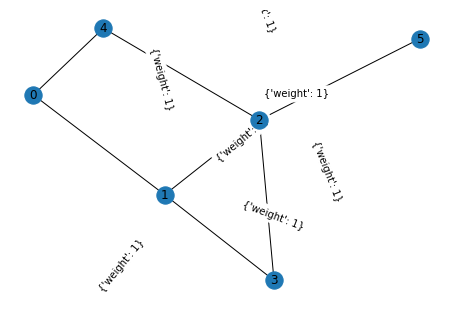

In [44]:
# Now draw the graph and add in edge labels using the positions and edge 
# attributes - WARNING Matplotlib doesn't always produce a good looking figure!

# Draw the graph
nx.draw(g3, with_labels=True)

# Add the weights as labels to the edges
nx.draw_networkx_edge_labels(g3, pos, labels = edges_labels)

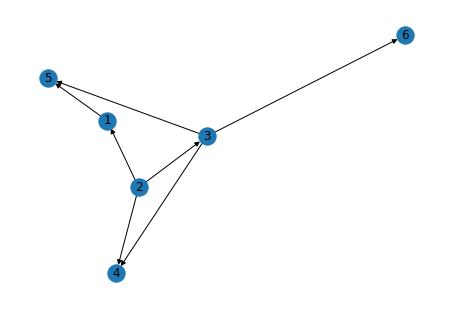

In [45]:
# Directed network

# Create a directed graph by specifying the edges
g_dir = nx.DiGraph()
g_dir.add_edges_from([(1,1), (2,1), (2,3), (2,4), (3,4), (3,5), (1,5), (3,6)])

# The bold line segments indicate the diection of the edge, the bold end 
# points to the destination node
nx.draw(g_dir, with_labels=True)

In [46]:
g_dir.edges()

OutEdgeView([(1, 1), (1, 5), (2, 1), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6)])

In [47]:
adj_dir = nx.adjacency_matrix(g_dir)
adj_dir.todense()

# In Networkx, if A_ij =1 link goes from i to j.
# For example, A_21 = 1 and there is a link form node 2 to 1. 
# This differs from Newmans book in which A_ij = 1 means a link form j to i.

matrix([[1, 0, 0, 0, 1, 0],
        [1, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int32)

In [48]:
# When calculating the degree of a directed network you can either calculate
# the 'in' degree or the 'out' degree

In [49]:
g_dir.degree()

DiDegreeView({1: 4, 2: 3, 3: 4, 4: 2, 5: 2, 6: 1})

In [50]:
g_dir.in_degree()

InDegreeView({1: 2, 2: 0, 3: 1, 4: 2, 5: 2, 6: 1})

In [51]:
g_dir.out_degree()

OutDegreeView({1: 2, 2: 3, 3: 3, 4: 0, 5: 0, 6: 0})

In [52]:
# Get the diameter - exception raised because diameter is infinite!
# This means that in this directed network it is not possible to reach 
# every node from each node, leading to an infinite diameter
nx.diameter(g_dir)

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [ ]:
# Can confirm the above but checking the connectivity
# Graph is not strongly connected but is weakly connected
nx.is_strongly_connected(g_dir)

In [ ]:
nx.is_weakly_connected(g_dir)

In [ ]:
# So to get a diameter value the graph needs to be converted to an undirected
# graph
nx.diameter(g_dir.to_undirected())

In [53]:
# Alternatively, calculate the length of the longest path possible

def path_length(G,node_list, weight=None):
    '''Calculate the path length given a list of nodes. Optionally
    account for the weight of an edge.
    '''
    length = 0
    for i in range(len(node_list)-1):
        s = node_list[i]
        t = node_list[i+1]
        if weight == None:
            # Just add one to the length, representing this edge
            length+=1
        else:
            # Add the weight of the edge to the length
            lenght+=G.get_edge_data(s,t, default = 0)[weight]
    return length

In [60]:
# Calculate all simple paths between each node pair, and return the length of the largest one
# What are these paths called? Are they components? Need to clarify the language here.

# Iterate over all combinations of 2 nodes
import itertools
combs = itertools.combinations(g_dir.nodes, 2)

max_path_length = 0
max_path = None
for i,j in combs:
    # Iterate over all shortest paths between these two nodes
    # If there isn't a path between the nodes the loop won't run
    # rather than throwing an exception dur to infinite path length
    # which is what the diameter() function does.
    for path in nx.all_simple_paths(g_dir, i,j):
        length = path_length(g_dir, path, weight = None)
        print(path, length) # Check that the 
        if length > max_path_length:
            max_path_length = length
            max_path = path

print("Max path length:{}".format(max_path_length))
print("Max path: {}".format(max_path))

[1, 5]
1
[2, 3]
1
[2, 3, 4]
2
[2, 4]
1
[2, 1, 5]
2
[2, 3, 5]
2
[2, 3, 6]
2
[3, 4]
1
[3, 5]
1
[3, 6]
1
Max path length:2
Max path: [2, 3, 4]


In [58]:
g_dir.get_edge_data(3,6, default = 0)

{}